In [1]:
from knn.knn import KNNClassifier
import numpy as np
import pandas as pd
import time

In [2]:
data = pd.read_csv('data/MNIST_train_small.csv', header = None)
Y = data.iloc[:, 0]
X = data.iloc[:, 1:]

In [3]:
df = pd.DataFrame()

In [4]:
# Andrei's part
a = 1
b = 6

# Luc's part 
#a = 6
#b = 11

# Nick's part
#a=11
#b=16

# Sri's part
#a = 16
#b = 21

In [5]:
#t1 = time.process_time() 

for k in np.arange(a,b):
    for p in np.arange(1,16):
        model = KNNClassifier(k = k, p = p).fit(X,Y)
        df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
        df.to_csv('k{}_to_{}.csv'.format(a,b))
#t2 = time.process_time()
#print(np.round(t2 - t1, 5))
df.to_csv('k{}_to_{}.csv'.format(a,b))

C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be

C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be

C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'k': k, 'p': p, 'loss': model.calculate_loocv()}, ignore_index=True)
C:\Users\onii-chan\AppData\Local\Temp\ipykernel_1480\447284846.py:6: FutureWarning: The frame.append method is deprecated and will be

In [24]:
#replace later with all the results
data = 'k1_to_6.csv'

df_g = pd.read_csv(data, header = 0, index_col=0)
df_g['loss'] = np.round(df_g['loss'], 5)

<AxesSubplot:xlabel='p', ylabel='k'>

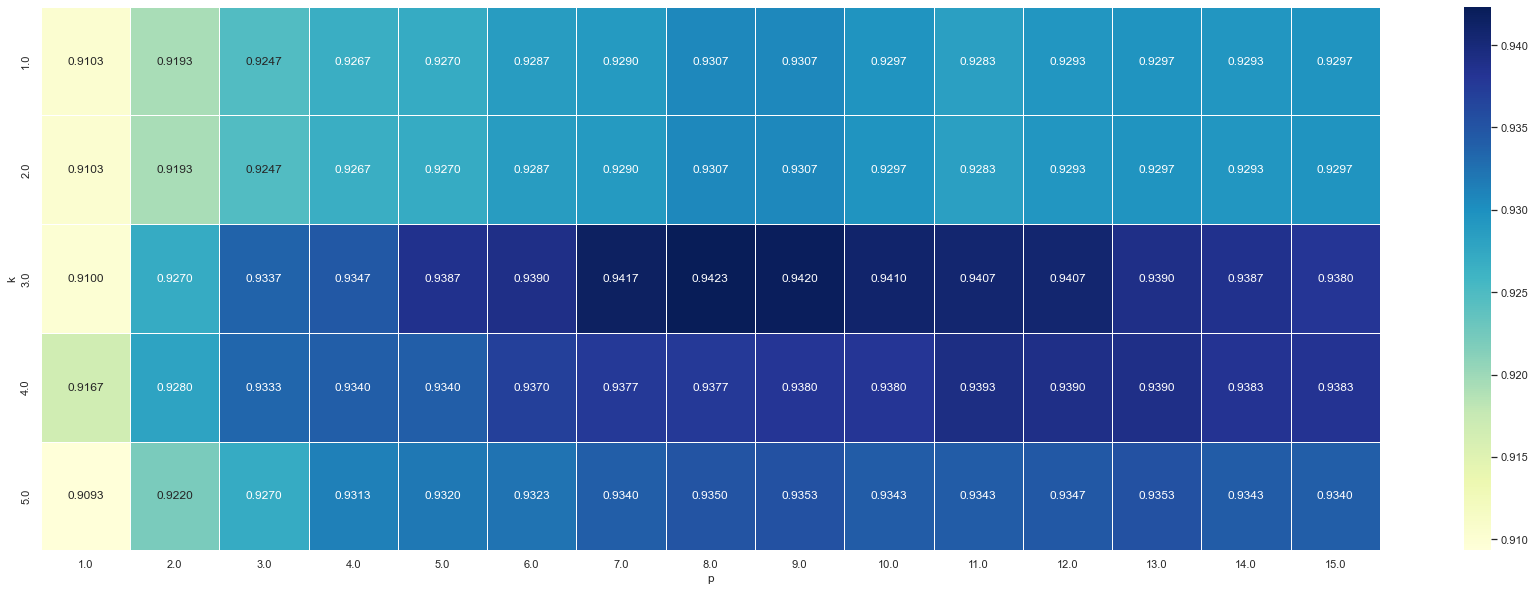

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(df_g.pivot(index='k', columns = 'p', values = 'loss'), annot=True, linewidths=.5, cmap="YlGnBu", fmt = '.4f')

-----

Optimized version to calculate it on my own:

In [11]:
from knn.knn import ExperimentalKNNClassifier
from scipy.spatial.distance import cdist
from knn.knn import accuracy, majority

In [12]:
df = pd.DataFrame()
for p in np.arange(1,16):
    distances = cdist(XA=X, XB=X, metric='minkowski', p=p)
    for k in np.arange(1,21):
        labels = np.tile(Y, (X.shape[0], 1))
        supermatrix = np.zeros((X.shape[0], k, 2))

        # sort distances
        sorted_points_indices = np.apply_along_axis(np.argsort, 1, distances)[:, 1:k+1]
        supermatrix[:, :, 0] = distances[np.arange(sorted_points_indices.shape[0])[:, None], sorted_points_indices]
        # sort labels according to indices
        supermatrix[:, :, 1] = labels[np.arange(sorted_points_indices.shape[0])[:, None], sorted_points_indices]

        # predict labels using rule with tie-breaking extension
        loocv_labels = np.apply_along_axis(majority, 1,
                                                    supermatrix.reshape((supermatrix.shape[0],
                                                                         2 * supermatrix.shape[1]),
                                                                        order='F'), k=k)
        loocv_accuracy = accuracy(Y, loocv_labels)
        df = df.append({'k': k, 'p': p, 'loss': loocv_accuracy}, ignore_index=True)

df.to_csv('check.csv'.format(a,b))

NameError: name 'a' is not defined

In [ ]:
df.to_csv('check.csv')


<AxesSubplot:xlabel='p', ylabel='k'>

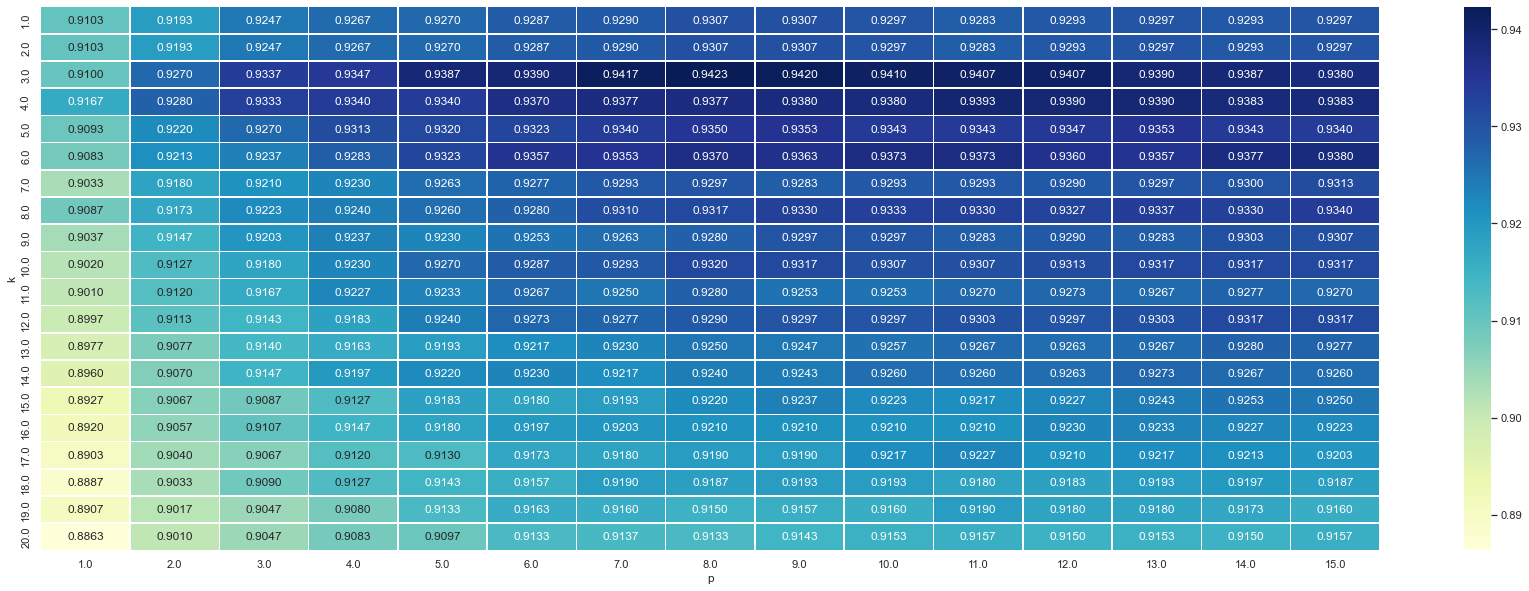

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(df.pivot(index='k', columns = 'p', values = 'loss'), annot=True, linewidths=.5, cmap="YlGnBu", fmt = '.4f')